In [66]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 

In [67]:
thegeneral=  pd.read_csv('/Users/aliciaortiz/Documents/dq-9-finding-the-at-fault-party-with-claims-nlp-a-team/NSS_DS_data.thegeneral.csv')
thegeneral.head()

,ClaimID_RGEN,ExposureID_RGEN,ClaimLevelBody,ExposureLevelBody,AccidentDescription,InjuryDescription,DamageDescription,SeverityTypeName,ClaimGroup,FaultRatingName,LossCauseName,CCCreateTime,CloseDate,StateName
0,10000,131005,reviewed\r\ncoverage sc rated policy and loss...,none none liability accepted by adverse and da...,the insured was test driving a vehicle the ov...,neckback,front left side damages towed collision tow i...,Moderate,Tampa Field Ops,Other party at fault,Collision with motor vehicle,2015-03-12 09:05:17.9100000,2015-04-29 11:25:18.3190000,South Carolina
1,10001,131006,c dol *******\r\n tol *** pm\r\n v...,c coverage\r\ndol *****\r\nfnol ***** by ni \...,the iv was driving down the road when the ov i...,pain,front right headlight front side of bumper dr...,Minor,Tampa Field Ops,Other party at fault,Collision while merging / lane change,2015-03-12 11:46:23.1590000,2015-07-06 08:26:47.5350000,Florida
2,10002,131007,insured was in the hospital and lost service ...,none none c coverage\r\ndol *****\r\nfnol ***...,insured was stopped at the stop light when cv ...,strain,unknown damages rear bumper trunk right rear ...,Minor,Tampa Field Ops,Other party at fault,Rear-end collision,2015-03-12 13:12:35.4440000,2017-11-20 14:17:39.0910000,Florida
3,10003,131008,insured was in the hospital and lost service ...,none none hhcsi dos ****** atd for brant willi...,insured was stopped at the stop light when cv ...,back,unknown damages rear bumper trunk right rear ...,NaN,Tampa Field Ops,Other party at fault,Rear-end collision,2015-03-12 13:12:35.4440000,2017-11-20 14:17:39.0910000,Florida
4,10004,131009,adjuster out of office\r\nreassigned adjuster ...,new pip loss received additional action neede...,ov re host veh,neck back,none none none,Minor,Fast Track,Other party at fault,Collision with motor vehicle,2015-03-12 16:35:17.3570000,2016-01-29 13:54:25.6150000,Florida


In [68]:

from collections import Counter
#Counter(thegeneral['InjuryDescription'], return_counts=True)

In [69]:
#Descriptive Analysis

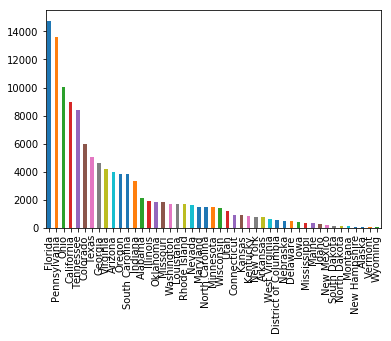

In [70]:
#state counts 
thegeneral['StateName'].value_counts().plot(kind='bar')

In [71]:
#state counts 
thegeneral['SeverityTypeName'].value_counts()

Minor                                     57468
Moderate                                  24631
Major (hospitalization 3+ days or ICU)     4422
Death                                       955
Life-threatening                            223
Name: SeverityTypeName, dtype: int64

In [24]:
#thegeneral.pivot_table(index=['StateName','ClaimGroup'], aggfunc='count')

AccidentDescription  CCCreateTime  \
StateName ClaimGroup                                                  
Alabama   Albany Casualty Ops                      12            12   
          Atlanta Casualty Ops                     97            97   
          Atlanta Field Ops                        26            26   
          CCU                                      69            69   
          Central SIU                               1             1   
          Claims Overflow                          47            47   
          Cleveland Casualty Ops                   56            56   
          Cleveland Field Ops                       2             2   
          DMA Vendor                               12            12   
          Fast Track                              132           132   
          Inactive                                  2             2   
          Inbound Subrogation                      20            20   
          Large Loss 1                             94            94   
          Large Loss 2                            213           213   
          Large Loss 3                              1             1   
          NARBI                                    67            67   
          Nashville Casualty Ops                  307           307   
          Nashville Field Ops                     336           336   
          Non Claims                               10            10   
          PIP                                      30            30   
          Premium Fraud SIU                         2             2   
          Recoveries                               19            19   
          Specialty                                 3             3   
          Tampa Casualty Ops                      170           170   
          Tampa Field Ops                         354           354   
          Total Loss                               38            38   
Alaska    CCU                                      11            11   
          Fast Track                                1             1   
          Inbound Subrogation                       5             5   
          Large Loss 1                              3             3   
...                                               ...           ...   
Wisconsin Atlanta Casualty Ops                      2             2   
          Atlanta Field Ops                         1             1   
          CCU                                      59            59   
          Claims Overflow                          53            53   
          Claims QA                                13            13   
          Cleveland Casualty Ops                  121           121   
          Cleveland Field Ops                     241           241   
          DMA Vendor                               46            46   
          Fast Track                               19            19   
          Inactive                                  4             4   
          Inbound Subrogation                      20            20   
          Large Loss 1                             25            25   
          Large Loss 2                             40            40   
          Large Loss 3                              4             4   
          NARBI                                   103           103   
          Nashville Casualty Ops                    8             8   
          Nashville Field Ops                      12            12   
          Non Claims                                7             7   
          PIP                                     129           129   
          Phoenix Casualty Ops                      4             4   
          Tampa Field Ops                           5             5   
          Total Loss                               58            58   
Wyoming   Atlanta Casualty Ops                      1             1   
          Large Loss 1                              2     

In [72]:
thegeneral['LossCauseName'].value_counts()
#the majority of the claim groups derive from PIP and the least amount from Admin. #
#the majority of the loss causes derive from IV rear-end CV. The least amount coming from Hail. 


IV rear-end CV                           30669
Collision in an intersection             19367
Collision with motor vehicle             17548
Collision while merging / lane change    10694
CV rear-end IV                            9927
Collision while turning left              7634
Collision with fixed object               5960
Rear-end collision                        4526
Collision while backing                   3150
Hit and Run                               2699
Collision with pedestrian                 2406
Collision with a parked car               1358
Rollover                                  1278
Hazardous Condition                        864
Collision with bicycle / motorcycle        832
IV struck by or struck animal              517
IV struck while parked                     390
Falling or moving object                   312
IV theft                                   139
Collision with train or bus                107
Malicious mischief and vandalism            83
Fire         

In [73]:
thegeneral.pivot_table(index=['StateName','SeverityTypeName'], aggfunc='count')

AccidentDescription  \
StateName     SeverityTypeName                                              
Alabama       Death                                                    16   
              Life-threatening                                         10   
              Major (hospitalization 3+ days or ICU)                  109   
              Minor                                                  1001   
              Moderate                                                389   
Alaska        Major (hospitalization 3+ days or ICU)                    5   
              Minor                                                    27   
              Moderate                                                 24   
Arizona       Death                                                    28   
              Life-threatening                                          7   
              Major (hospitalization 3+ days or ICU)                  176   
              Minor                                                  1927   
              Moderate                                                794   
Arkansas      Death                                                     6   
              Life-threatening                                          1   
              Major (hospitalization 3+ days or ICU)                   10   
              Minor                                                   333   
              Moderate                                                200   
California    Death                                                    49   
              Life-threatening                                          3   
              Major (hospitalization 3+ days or ICU)                  216   
              Minor                                                  4640   
              Moderate                                               1891   
Colorado      Death                                                    54   
              Life-threatening                                         15   
              Major (hospitalization 3+ days or ICU)                  222   
              Minor                                                  2713   
              Moderate                                               1331   
Connecticut   Death                                                     4   
              Life-threatening                                          1   
...                                                                   ...   
Utah          Death                                                     7   
              Life-threatening                                          2   
              Major (hospitalization 3+ days or ICU)                   38   
              Minor                                                   505   
              Moderate                                                325   
Vermont       Death                                                     2   
              Major (hospitalization 3+ days or ICU)                    3   
              Minor                                                    24   
              Moderate                                                  5   
Virginia      Death                                                    32   
              Life-threatening                                          3   
              Major (hospitalization 3+ days or ICU)                  146   
              Minor                                                  1907   
              Moderate                                                832   
Washington    Death                                                     8   
              Life-threatening                                          4   
              Major (hospitalization 3+ days or ICU)                   34   
              Minor                                                   864   
              Moderate                                                326   
West Virginia Death                               

In [34]:
#Florida

In [74]:
thegeneral_florida = thegeneral.loc[thegeneral['StateName'] == 'Florida']



In [75]:
thegeneral['InjuryDescription'].isnull().sum()

38

In [76]:
thegeneral_florida.head()

,ClaimID_RGEN,ExposureID_RGEN,ClaimLevelBody,ExposureLevelBody,AccidentDescription,InjuryDescription,DamageDescription,SeverityTypeName,ClaimGroup,FaultRatingName,LossCauseName,CCCreateTime,CloseDate,StateName
1,10001,131006,c dol *******\r\n tol *** pm\r\n v...,c coverage\r\ndol *****\r\nfnol ***** by ni \...,the iv was driving down the road when the ov i...,pain,front right headlight front side of bumper dr...,Minor,Tampa Field Ops,Other party at fault,Collision while merging / lane change,2015-03-12 11:46:23.1590000,2015-07-06 08:26:47.5350000,Florida
2,10002,131007,insured was in the hospital and lost service ...,none none c coverage\r\ndol *****\r\nfnol ***...,insured was stopped at the stop light when cv ...,strain,unknown damages rear bumper trunk right rear ...,Minor,Tampa Field Ops,Other party at fault,Rear-end collision,2015-03-12 13:12:35.4440000,2017-11-20 14:17:39.0910000,Florida
3,10003,131008,insured was in the hospital and lost service ...,none none hhcsi dos ****** atd for brant willi...,insured was stopped at the stop light when cv ...,back,unknown damages rear bumper trunk right rear ...,NaN,Tampa Field Ops,Other party at fault,Rear-end collision,2015-03-12 13:12:35.4440000,2017-11-20 14:17:39.0910000,Florida
4,10004,131009,adjuster out of office\r\nreassigned adjuster ...,new pip loss received additional action neede...,ov re host veh,neck back,none none none,Minor,Fast Track,Other party at fault,Collision with motor vehicle,2015-03-12 16:35:17.3570000,2016-01-29 13:54:25.6150000,Florida
5,10005,131010,adjuster out of office\r\nreassigned adjuster ...,none none closing um coverage at this time\r\n...,ov re host veh,neck back,none none none,Minor,Fast Track,Other party at fault,Collision with motor vehicle,2015-03-12 16:35:17.3570000,2016-01-29 13:54:25.6150000,Florida


In [ ]:
#Rear-end collisions 

In [47]:
readend_collision = thegeneral.loc[thegeneral['LossCauseName'] == 'Rear-end collision']
readend_collision.head()

,ClaimID_RGEN,ExposureID_RGEN,ClaimLevelBody,ExposureLevelBody,AccidentDescription,InjuryDescription,DamageDescription,SeverityTypeName,ClaimGroup,FaultRatingName,LossCauseName,CCCreateTime,CloseDate,StateName
2,10002,131007,insured was in the hospital and lost service ...,none none c coverage\r\ndol *****\r\nfnol ***...,insured was stopped at the stop light when cv ...,strain,unknown damages rear bumper trunk right rear ...,Minor,Tampa Field Ops,Other party at fault,Rear-end collision,2015-03-12 13:12:35.4440000,2017-11-20 14:17:39.0910000,Florida
3,10003,131008,insured was in the hospital and lost service ...,none none hhcsi dos ****** atd for brant willi...,insured was stopped at the stop light when cv ...,back,unknown damages rear bumper trunk right rear ...,NaN,Tampa Field Ops,Other party at fault,Rear-end collision,2015-03-12 13:12:35.4440000,2017-11-20 14:17:39.0910000,Florida
11,10011,131016,the claimant said that there were * other pas...,none none closing for loi closing for loi,cv was driving down the highway when iv rear e...,neck injury,rear hitch frame and inside front end damages,Minor,Large Loss 2,Insured at fault,Rear-end collision,2015-03-16 07:52:46.6830000,2016-03-08 06:06:33.5690000,Florida
31,10031,131036,clear\r\n\r\ncoverage vnop and dnop appears ...,tl review\r\r\n\r\r\nfl polfl loss fl pip fol...,cv rear ended vnop nis daugher was passenger ...,neck soft tissue sprain strain,front end damage full front end damage rear e...,Minor,PIP,No fault,Rear-end collision,2015-03-17 09:58:53.9010000,2015-09-02 13:24:05.4860000,Florida
35,10035,131040,caller id **********\r\n\r\ncv insurance the g...,new claim assignment to p robertson\r\r\n\r\r\...,ni was in rental vehicle and iv was stopped an...,back left shoulder neck pain went to the hosp...,rear hatch and rear bumper tail lights\r\niv w...,Minor,Tampa Field Ops,Other party at fault,Rear-end collision,2015-03-17 13:40:49.9540000,2018-04-13 10:26:24.0910000,Florida


In [56]:
import datetime
from datetime import timedelta
 
datetimeFormat = '%Y-%m-%d %H:%M:%S.%f'

In [57]:
date1 = thegeneral['CCCreateTime']
date2 = thegeneral['CloseDate']

In [58]:
diff = datetime.datetime.strptime(date1, datetimeFormat)\
    - datetime.datetime.strptime(date2, datetimeFormat)

TypeError: strptime() argument 1 must be str, not Series

In [96]:
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import sent_tokenize, word_tokenize


In [105]:
from nltk.corpus import stopwords

In [108]:
stop = stopwords.words('english')

In [115]:
from collections import Counter
#tokens = word_tokenize(thegeneral['ClaimLevelBody'])
tok_words = [[word for word in word_tokenize(doc) if word not in stop] for doc in thegeneral['DamageDescription'].tolist()]

AttributeError: 'list' object has no attribute 'info'